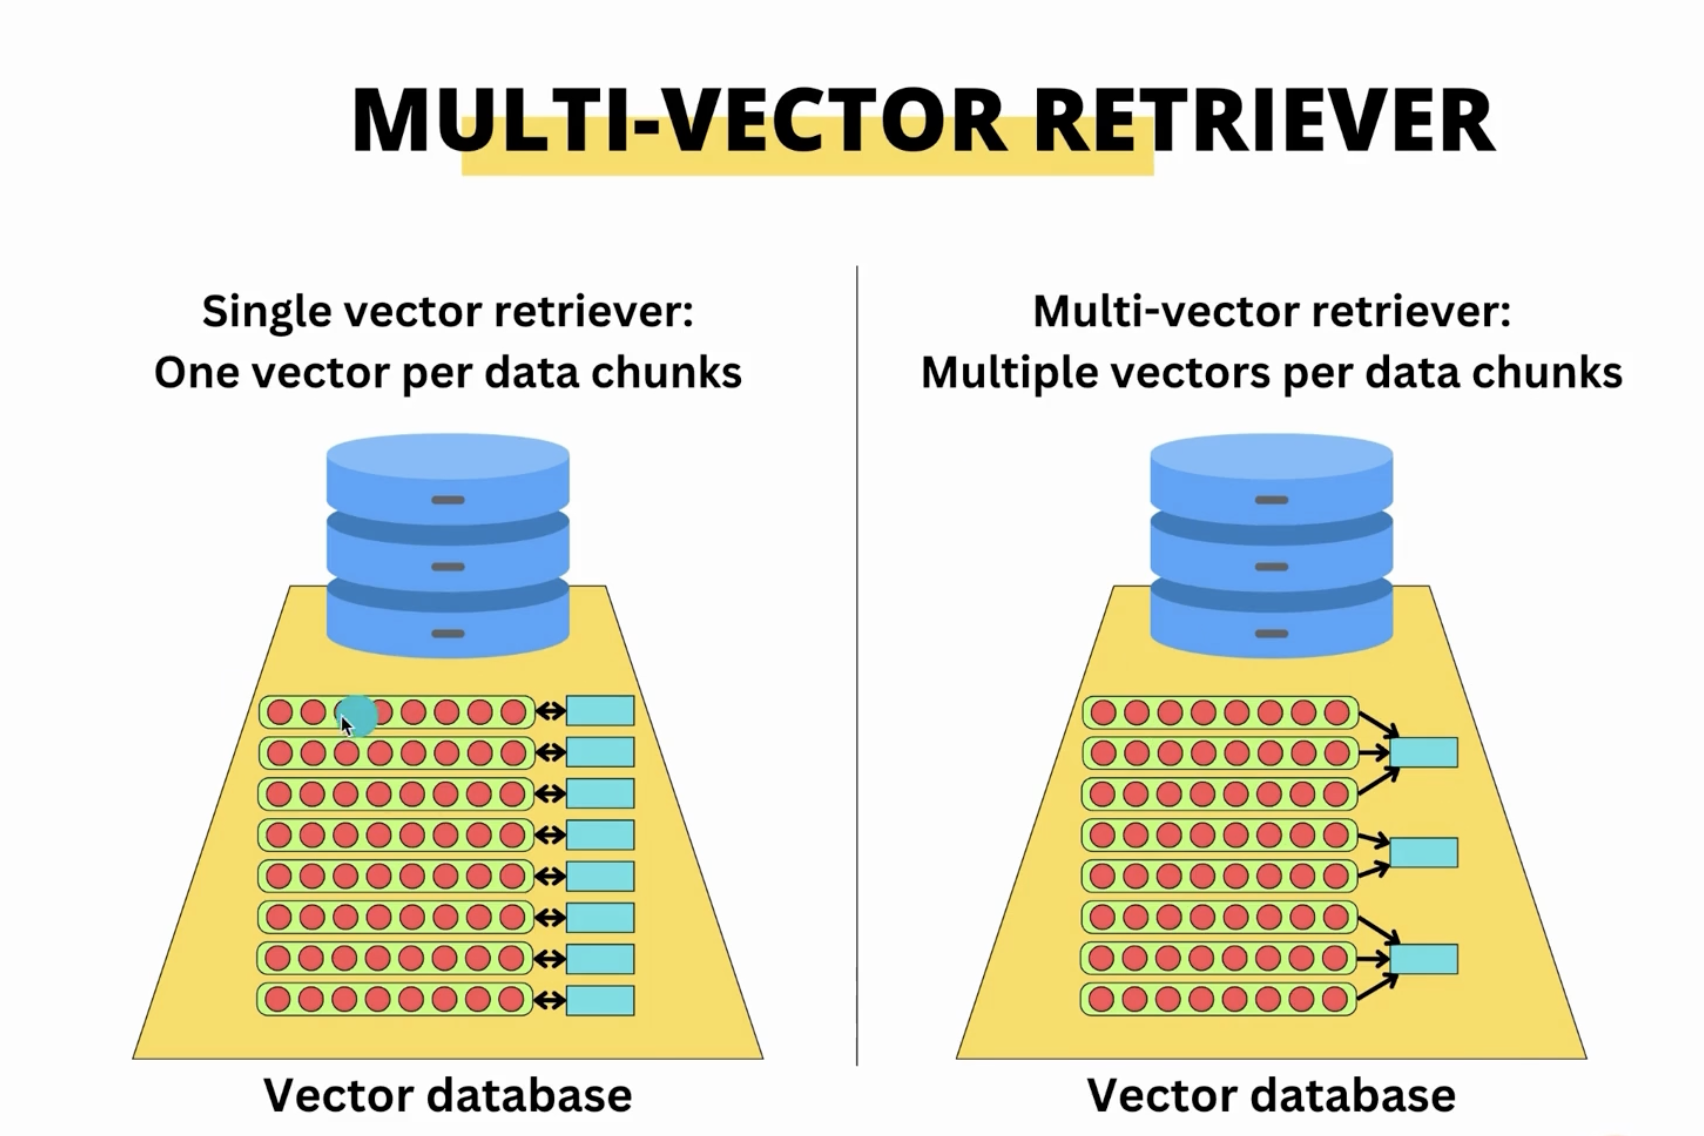

In [6]:
!pip install -U unstructured unstructured-inference onnx pytesseract chromadb langchain langchain-openai openai pypdf

  Using cached unstructured-0.12.4-py3-none-any.whl (1.8 MB)
  Using cached unstructured_inference-0.7.24-py3-none-any.whl (60 kB)
  Using cached onnx-1.15.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (15.7 MB)
  Using cached pytesseract-0.3.10-py3-none-any.whl (14 kB)
  Using cached chromadb-0.4.22-py3-none-any.whl (509 kB)
  Using cached langchain-0.1.6-py3-none-any.whl (811 kB)
  Using cached langchain_openai-0.0.5-py3-none-any.whl (29 kB)
  Using cached openai-1.12.0-py3-none-any.whl (226 kB)
  Using cached pypdf-4.0.1-py3-none-any.whl (283 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl (19 kB)
  Using cached python_magic-0.4.27-py2.py3-none-any.whl (13 kB)
  Using cached emoji-2.10.1-py2.py3-none-any.whl (421 kB)
  Using cached dataclasses_json-0.6.4-py3-none-any.whl (28 kB)
  Using cached python_iso639-2024.2.7-py3-none-any.whl (274 kB)
  Using cached langdetect-1.0.9.tar.gz (981 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 0s (425 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


In [21]:
from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryByteStore

from langchain_community.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma

In [11]:
loader = PyPDFLoader('/content/book.pdf')
pages = loader.load_and_split()

In [16]:
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size=10000,
    chunk_overlap=20,
    length_function=len,
    is_separator_regex=False,
)

In [17]:
text = text_splitter.split_documents(pages)

In [18]:
text

[Document(page_content='MACHINE LEARNING\n010001010111010001101000\n011001010110110100100000\n010000010110110001110000\n011000010111100101100100\n01101001011011100000110 1\n0000101 00100110101100001\n01100011011010000110100 1\n011011100110010100100000\n01001100011001010110000 1\n01110010011011100110100 1\n01101110011001110000110 1\n00001010 0101010001101000\n01100101001000000100111001100101011101110010000001000001010010010000110 1\n00001010', metadata={'source': '/content/book.pdf', 'page': 2}),
 Document(page_content='The MIT Press Essential Knowledge Series\nA complete list of the titles in this series appears at the back of this book.', metadata={'source': '/content/book.pdf', 'page': 3}),
 Document(page_content='MACHINE LEARNING\nREVISED AND UPDATED EDITION\nETHEM ALPAYDIN\nThe MIT Press        |        Cambridge, Massachusetts        |        London, England', metadata={'source': '/content/book.pdf', 'page': 4}),
 Document(page_content='© 2021 Massachusetts Institute of Technology

In [23]:
from google.colab import userdata
openai_api_key = userdata.get('OPENAI_API_KEY')

In [24]:
embeddings = OpenAIEmbeddings(openai_api_key = openai_api_key)

# There are 2 Stores

# 1. Vector Store
vectorStore = Chroma(
    collection_name = "book_vector",
    embedding_function = embeddings
)

# 2. Data Store
store = InMemoryByteStore()
id_key = "doc_id"


# Link both the storage - Connect vector store to store
retriever = MultiVectorRetriever(
    vectorstore= vectorStore,
    byte_store=store,
    id_key = id_key
)

In [25]:
retriever

MultiVectorRetriever(vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x7c9600ebb610>, byte_store=<langchain.storage.in_memory.InMemoryBaseStore object at 0x7c9600ebbeb0>, docstore=<langchain.storage.encoder_backed.EncoderBackedStore object at 0x7c95f966a020>)

Create IDs for the documents

In [27]:
import uuid
docs_ids = [str(uuid.uuid4()) for _ in text]

IDs have been creted for each document.

In [28]:
docs_ids

['fb6393c4-aa43-4800-a4bd-d7887cc1863c',
 '28c3687c-d3b7-4cbf-a5da-c051e9496e96',
 '43b94aad-c557-40cf-bfcc-9a446e8d7d03',
 'a8fa9c01-6a1b-40c4-9034-5098050a1ce4',
 'e68ee75e-41ec-4052-ae41-a318b781ba9c',
 '48862e00-1be3-4c5e-baa5-60134fe19cb8',
 '36e16de7-b82b-4575-90dc-2c1682a8d333',
 'cba5e7b2-7dce-42e3-8079-724cbbd92d7d',
 'a14c99a7-ed17-4a4d-8542-576b0f34e436',
 '3e7047c2-d633-4c80-95ea-94b7358f4bbb',
 'a393647d-628c-4bf0-992b-c9528e3b8740',
 '2b65cad5-e918-492b-b314-34c47dd3dae5',
 '2f2b5a9f-9194-4ef3-a4a7-5ff23d58ba77',
 '39d76d05-adb5-42bb-8637-ae84b988cb5c',
 '914e57c3-5f00-486e-abdc-f2249c39c419',
 '1df42e99-f6d4-4b9d-9d4f-f2cffe8566d0',
 '9cd3d250-8e92-4f5a-964c-637fb259142d',
 '68926137-c892-404e-9d61-54d895b3996c',
 '00f36054-7759-4d01-8559-e39b85a8fbc7',
 '7c003622-4dbc-4319-a6f2-4c4959ad5dcb',
 '6a373a32-4086-46d5-a8cb-c932a3733a62',
 '0fdc3d92-3fde-44cd-b8ad-514b99e3519b',
 '91078feb-f7cb-4d38-bd12-16c4e046bce4',
 '1cb4e70e-9c0c-4175-b987-55cbc8f885b7',
 'ccf17b9c-927d-

## MultiVector Retrieval:

Problem with larger document is that it becomes difficult to cluster them together.<br>
so<br>
Take the documents and partition them further into smaller document and then index those smaller document. Now this smaller document will be used to retrieve larger document.

In [29]:
child_text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size=100,
    chunk_overlap=10,
    length_function=len,
    is_separator_regex=False,
)

In [31]:
# Iterate through all the docs
all_sub_docs = []

for idx, doc in enumerate(text):
  doc_id = docs_ids[idx] # get the id of parent document and assign it to child

  sub_docs = child_text_splitter.split_documents([doc]) # Split parent document
  print(sub_docs)

  for sub_doc in sub_docs:
    sub_doc.metadata[id_key] = doc_id # add child id to metadata of child document

  all_sub_docs.extend(sub_docs)

[Document(page_content='MACHINE LEARNING\n010001010111010001101000\n011001010110110100100000\n010000010110110001110000', metadata={'source': '/content/book.pdf', 'page': 2}), Document(page_content='011000010111100101100100\n01101001011011100000110 1\n0000101 00100110101100001', metadata={'source': '/content/book.pdf', 'page': 2}), Document(page_content='01100011011010000110100 1\n011011100110010100100000\n01001100011001010110000 1', metadata={'source': '/content/book.pdf', 'page': 2}), Document(page_content='01110010011011100110100 1\n01101110011001110000110 1\n00001010 0101010001101000', metadata={'source': '/content/book.pdf', 'page': 2}), Document(page_content='01100101001000000100111001100101011101110010000001000001010010010000110 1\n00001010', metadata={'source': '/content/book.pdf', 'page': 2})]
[Document(page_content='The MIT Press Essential Knowledge Series', metadata={'source': '/content/book.pdf', 'page': 3}), Document(page_content='A complete list of the titles in this serie

In [32]:
all_sub_docs

[Document(page_content='MACHINE LEARNING\n010001010111010001101000\n011001010110110100100000\n010000010110110001110000', metadata={'source': '/content/book.pdf', 'page': 2, 'doc_id': 'fb6393c4-aa43-4800-a4bd-d7887cc1863c'}),
 Document(page_content='011000010111100101100100\n01101001011011100000110 1\n0000101 00100110101100001', metadata={'source': '/content/book.pdf', 'page': 2, 'doc_id': 'fb6393c4-aa43-4800-a4bd-d7887cc1863c'}),
 Document(page_content='01100011011010000110100 1\n011011100110010100100000\n01001100011001010110000 1', metadata={'source': '/content/book.pdf', 'page': 2, 'doc_id': 'fb6393c4-aa43-4800-a4bd-d7887cc1863c'}),
 Document(page_content='01110010011011100110100 1\n01101110011001110000110 1\n00001010 0101010001101000', metadata={'source': '/content/book.pdf', 'page': 2, 'doc_id': 'fb6393c4-aa43-4800-a4bd-d7887cc1863c'}),
 Document(page_content='01100101001000000100111001100101011101110010000001000001010010010000110 1\n00001010', metadata={'source': '/content/book.pd

Now there are 2 documents

1. Parent Document: text
2. Child Document: all_sub_docs

In [37]:
# add child documents to the vector store
retriever.vectorstore.add_documents(all_sub_docs)

# Add the ids with documents -  with the doc id we will retrieve the parent document
retriever.docstore.mset(list(zip(docs_ids , text)))

In [39]:
retriever.vectorstore.similarity_search("Linear Regression")

[Document(page_content='the linear model, we have linear regression. In machine', metadata={'doc_id': 'a7c5cad4-301d-4201-a5f7-6c032184fc15', 'page': 67, 'source': '/content/book.pdf'}),
 Document(page_content='the linear model, we have linear regression. In machine', metadata={'doc_id': 'a7c5cad4-301d-4201-a5f7-6c032184fc15', 'page': 67, 'source': '/content/book.pdf'}),
 Document(page_content='the linear model, we have linear regression. In machine', metadata={'doc_id': 'a7c5cad4-301d-4201-a5f7-6c032184fc15', 'page': 67, 'source': '/content/book.pdf'}),
 Document(page_content='of implementing a variant of the linear model we discussed', metadata={'doc_id': '994ae244-5e1c-4dfb-ad5d-ff4c05b25e32', 'page': 128, 'source': '/content/book.pdf'})]

In [40]:
retriever.get_relevant_documents('Linear Regression')

[Document(page_content='46  ChAPtER  2advantage of learning, namely, going from the particu -\nlar sample to the general population, is that now we can \nquery it with 25,000 miles, which is equivalent to ask -\ning, “What would be the price of a typical  car with 25,000 \nmiles?” where “typical” means averaged over all used cars \nwith 25,000 miles.\nSupervised Learning\nThis task of estimating a numeric output value from a \nset of input values is called regression  in statistics; for \nthe linear model, we have linear regression. In machine \nlearning, regression is one type of supervised learning . In \nthis type of learning, for each example we have the input \nand the desired output. The name comes from the sup -\nposition that there is a supervisor  who can provide us with \nthe desired output for any input. When we collect data by \nlooking at the cars currently sold in the market, we are \nable to observe both the attributes of the cars and also \ntheir prices.\nEarlier, we us

# In Chain

In [42]:
from langchain_openai import ChatOpenAI
from langchain.chains import RetrievalQA

llm = ChatOpenAI(openai_api_key = openai_api_key,
                 temperature=0.7)

In [44]:
from re import VERBOSE
chain = RetrievalQA.from_chain_type(
    llm = llm,
    retriever = retriever,
    verbose = True
)

In [45]:
chain.run("What is Linear Regression?")



> Entering new RetrievalQA chain...

> Finished chain.


'Linear regression is a type of supervised learning algorithm used in machine learning and statistics. It is used to estimate a numeric output value based on a set of input values. In linear regression, the relationship between the input variables and the output variable is assumed to be linear. The algorithm calculates the parameters (weights) of the linear model based on the given data, in order to make accurate predictions. Linear regression is popular because it is simple to understand and interpret, and it can work well for many different tasks.'

# Hypothetical Question for RAG

Instead of indexing the data with small text we index the data with the potential question we could ask about the data.

In [46]:
# Create question
from langchain.chains import LLMChain
from langchain.output_parsers import NumberedListOutputParser


prompt = """
  Generate a numberd list of 3 hypothetical questions that the below document could be use to answer:

  {docs}
"""

llm = ChatOpenAI(openai_api_key=openai_api_key,
                 temperature=0)

chain = LLMChain.from_string(
    llm = llm,
    template=prompt
)


chain.verbose = True
chain.output_parser = NumberedListOutputParser()

In [51]:
# Check what question can be created for document 20"
chain.run(text[20].page_content)



> Entering new LLMChain chain...
Prompt after formatting:

  Generate a numberd list of 3 hypothetical questions that the below document could be use to answer:

  4  ChAPtER  1After the invention of the microprocessor and paral -
lel advances in miniaturization and decreasing costs, per -
sonal computers became increasingly available starting in 
the early 1980s. The personal computer  has made comput -
ing accessible to small businesses, but most important the 
personal computer was small and cheap enough to be a 
household appliance. You did not need to be a large com -
pany; the computer could help with your life too. The per -
sonal computer confirmed that everyone had tasks that 
are computer-  worthy, and the growth of applications fol -
lowed this era of democratization of digital technology.
Graphical user interfaces and the mouse made the per -
sonal computer easy to use. We do not need to learn pro -
gramming, or memorize commands with a difficult syntax, 
to be able to us

['How did the invention of the microprocessor and the availability of personal computers in the early 1980s contribute to the democratization of digital technology?',
 'What role did graphical user interfaces and the mouse play in making personal computers accessible and easy to use?',
 'How has the software for personal computers evolved from commercial to personal applications, and what impact has this had on our daily lives and leisure activities?']

In [48]:
# Create a vector store and data store

# 1. Vectorstore
vectorStore = Chroma(
    collection_name = "Hypo-ques",
    embedding_function=embeddings
)

# 2. Data Store
store = InMemoryByteStore()
id_key = 'doc_id'

# Map both the store
retriever = MultiVectorRetriever(
    vectorstore=vectorStore,
    byte_store=store,
    id_key = id_key,
)

In [49]:
retriever

MultiVectorRetriever(vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x7c95e29a9750>, byte_store=<langchain.storage.in_memory.InMemoryBaseStore object at 0x7c95e29ab4f0>, docstore=<langchain.storage.encoder_backed.EncoderBackedStore object at 0x7c95e29a8dc0>)

In [50]:
# Create unique ids for document
docs_ids = [str(uuid.uuid4()) for _ in text]

In [52]:
from langchain.schema.document import Document
question_docs = []

for i , doc in enumerate(text):
  result = chain.run(doc.page_content)

  question_docs.extend([
      Document(
          page_content=s,
          metadata={id_key: docs_ids[i]}
      )for s in result
  ]
  )

Streaming output truncated to the last 5000 lines.
Recurrent neural networks are used in many tasks 
where the time dimension is important, as in speech or 
language processing, where what we would like to rec -
ognize are sequences. In a translation of text from one


> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

  Generate a numberd list of 3 hypothetical questions that the below document could be use to answer:

  nEuRAL  nEtW oRks And dEEP  LEARnIng   115language to another, not only the seen input but also the 
generated output is a sequence.
More complex types of recurrent connections are 
also possible. In a long short-  term memory (LSTM) unit 
(Hochreiter and Schmidhuber 1997), there is a “forget 
gate” where this type of effect can be turned on or off  
(see figure 9). So depending on where and how the gate is 
turned on and off, the network can be selective as to what 
to remember from the past.C B AXg
Figure 9  The “forget gate” g is another

In [53]:
question_docs

[Document(page_content='What is the significance of the binary code "010001010111010001101000" in the context of machine learning?', metadata={'doc_id': '090155d2-6428-4e22-b423-9eb4a7a78a8f'}),
 Document(page_content='How does the binary code "011001010110110100100000" relate to the field of machine learning?', metadata={'doc_id': '090155d2-6428-4e22-b423-9eb4a7a78a8f'}),
 Document(page_content='What information can be derived from the binary code "010000010110110001110000" in the context of machine learning?', metadata={'doc_id': '090155d2-6428-4e22-b423-9eb4a7a78a8f'}),
 Document(page_content='What are the titles included in The MIT Press Essential Knowledge Series?', metadata={'doc_id': '7d6d3d34-7449-4df2-a924-f2ea32e3bd26'}),
 Document(page_content='Where can I find a complete list of the titles in The MIT Press Essential Knowledge Series?', metadata={'doc_id': '7d6d3d34-7449-4df2-a924-f2ea32e3bd26'}),
 Document(page_content='What is the purpose or objective of The MIT Press Esse

In [54]:
# add to vector store
retriever.vectorstore.add_documents(question_docs)

retriever.docstore.mset(list(zip(docs_ids, text)))

In [55]:
retriever.vectorstore.similarity_search("Linear Regression")

[Document(page_content='What is regression in statistics and how does it relate to supervised learning?', metadata={'doc_id': '7adb75aa-3570-47aa-a45d-8758bc4eaa60'}),
 Document(page_content='What is the definition of regression in the context of machine learning?', metadata={'doc_id': '62b35f3a-7b25-4ca8-b57a-1429d76144a0'}),
 Document(page_content='What is the difference between regression and classification in credit scoring?', metadata={'doc_id': '0199c7b1-8e67-4b6b-91a6-8bd4d1c2aaba'}),
 Document(page_content='How does the support vector machine algorithm work for both classification and regression tasks?', metadata={'doc_id': '2b927fac-a5eb-4aa2-bca9-98bb1d275aca'})]

In [56]:
retriever.get_relevant_documents('Linear Regression')

[Document(page_content='46  ChAPtER  2advantage of learning, namely, going from the particu -\nlar sample to the general population, is that now we can \nquery it with 25,000 miles, which is equivalent to ask -\ning, “What would be the price of a typical  car with 25,000 \nmiles?” where “typical” means averaged over all used cars \nwith 25,000 miles.\nSupervised Learning\nThis task of estimating a numeric output value from a \nset of input values is called regression  in statistics; for \nthe linear model, we have linear regression. In machine \nlearning, regression is one type of supervised learning . In \nthis type of learning, for each example we have the input \nand the desired output. The name comes from the sup -\nposition that there is a supervisor  who can provide us with \nthe desired output for any input. When we collect data by \nlooking at the cars currently sold in the market, we are \nable to observe both the attributes of the cars and also \ntheir prices.\nEarlier, we us

In [57]:
chain = RetrievalQA.from_chain_type(
    llm = llm,
    retriever=retriever,
    verbose = True
)

In [58]:
chain.run('What is Linear Regression')



> Entering new RetrievalQA chain...

> Finished chain.


'Linear regression is a statistical technique used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables, meaning that the dependent variable can be predicted as a linear combination of the independent variables. In other words, it tries to find the best-fitting line that represents the relationship between the variables. This line is determined by estimating the coefficients (weights) of the independent variables in the linear equation. Linear regression is commonly used for prediction and forecasting tasks.'